<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 2

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 10/09/2021
- Convocatoria 2 - 06/10/2021

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros. 

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que hacer un tag al repositorio en una fecha anterior a la fecha de entrega de la actividad, y pegar el enlace al tag del repositorio en la actividad de blackboard.

# Olympics

### A1 - Leer Datasets - 10%
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

In [123]:
#importamos las librerías
import numpy as np
import pandas as pd
import requests
from pandas import DataFrame


#Lectura y almacenamiento de datos desde los ficheros descargados a csv desde la URL

#Resultados en los últimos 120 años
url1 = '../src/athlete_events.csv'
events = pd.read_csv(url1, sep=',', warn_bad_lines=True, error_bad_lines=False)

#Pruebas olímpicas y resultados
url2 = '../src/results.csv'
results = pd.read_csv(url2, sep=',', warn_bad_lines=True, error_bad_lines=False)

#Impresión de los ficheros completos
print(events)
print('\n')
print(results)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

b'Skipping line 156: expected 8 fields, saw 9\nSkipping line 157: expected 8 fields, saw 9\nSkipping line 158: expected 8 fields, saw 9\nSkipping line 317: expected 8 fields, saw 9\nSkipping line 318: expected 8 fields, saw 9\nSkipping line 319: expected 8 fields, saw 9\nSkipping line 1658: expected 8 fields, saw 9\nSkipping line 1659: expected 8 fields, saw 9\nSkipping line 1660: expected 8 fields, saw 9\nSkipping line 1784: expected 8 fields, saw 9\nSkipping line 1785: expected 8 fields, saw 9\nSkipping line 1786: expected 8 fields, saw 9\n'


### A2 - Análisis - 45%
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

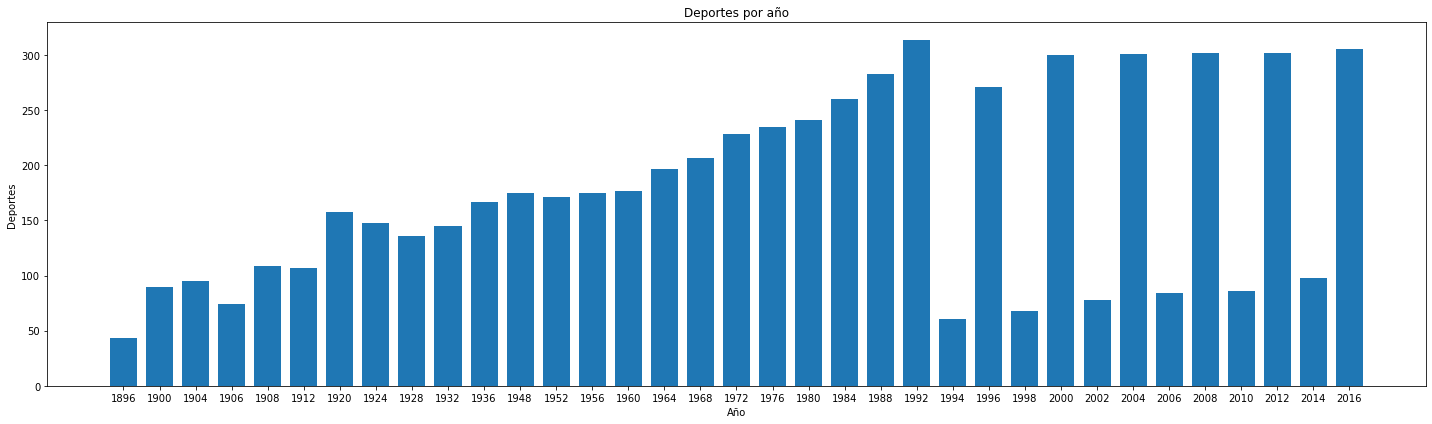

In [124]:
#importamos matplotlib
import matplotlib.pyplot as plt

#obtener los datos del Dataframe
years = np.sort(events['Year'].unique())    
sports_per_year = []
for i in range (len(years)):
    sports_per_year.append(len(events[events['Year'] == years[i]]['Event'].unique()))
    
# Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(20)
rects1 = ax.bar(np.arange(len(years)), sports_per_year, width=0.75, label=None)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deportes')
ax.set_title('Deportes por año')
ax.set_xticks(np.arange(len(years)))
ax.set_xticklabels(years)
ax.set_xlabel('Año')

#ajustamos e imprimimos la gráfica
fig.tight_layout()

plt.show()

In [125]:
# Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo

#Extraigo los valores del dataframe ordenados por sexo
df_athlete_by_sex = events.sort_values('Sex')

#Chicos
M_athletes = df_athlete_by_sex['Sex'] == 'M'
Male = df_athlete_by_sex[M_athletes]

#Chicas
F_athletes = df_athlete_by_sex['Sex'] == 'F'
Female = df_athlete_by_sex[F_athletes]




In [126]:
# Cargar datos en listas independientes

n_male = []
for i in range(len(years)):
    n_male.append(len(Male[Male['Year']==years[i]]['Name'].unique()))

n_female = []
for i in range(len(years)):
    n_female.append(len(Female[Female['Year']==years[i]]['Name'].unique()))


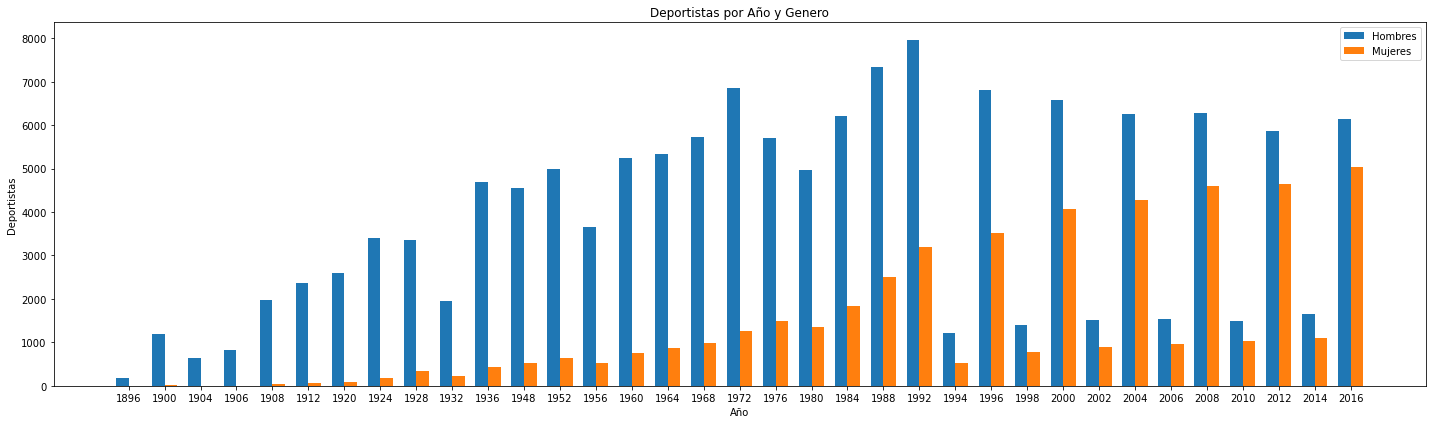

In [127]:
#realizamos el gráfico comparativo por genero

x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(20)
rects1 = ax.bar(x - width/2, n_male, width, label='Hombres')
rects2 = ax.bar(x + width/2, n_female, width, label='Mujeres')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deportistas')
ax.set_title('Deportistas por Año y Genero')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_xlabel('Año')
ax.legend()

fig.tight_layout()

plt.show()

In [128]:
#Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais 

#extraigo los valores ordenados por paises
nocs = np.sort(events['NOC'].unique()) 
print(nocs)
total_medals = events.dropna(axis=0, subset=['Medal'])

['AFG' 'AHO' 'ALB' 'ALG' 'AND' 'ANG' 'ANT' 'ANZ' 'ARG' 'ARM' 'ARU' 'ASA'
 'AUS' 'AUT' 'AZE' 'BAH' 'BAN' 'BAR' 'BDI' 'BEL' 'BEN' 'BER' 'BHU' 'BIH'
 'BIZ' 'BLR' 'BOH' 'BOL' 'BOT' 'BRA' 'BRN' 'BRU' 'BUL' 'BUR' 'CAF' 'CAM'
 'CAN' 'CAY' 'CGO' 'CHA' 'CHI' 'CHN' 'CIV' 'CMR' 'COD' 'COK' 'COL' 'COM'
 'CPV' 'CRC' 'CRO' 'CRT' 'CUB' 'CYP' 'CZE' 'DEN' 'DJI' 'DMA' 'DOM' 'ECU'
 'EGY' 'ERI' 'ESA' 'ESP' 'EST' 'ETH' 'EUN' 'FIJ' 'FIN' 'FRA' 'FRG' 'FSM'
 'GAB' 'GAM' 'GBR' 'GBS' 'GDR' 'GEO' 'GEQ' 'GER' 'GHA' 'GRE' 'GRN' 'GUA'
 'GUI' 'GUM' 'GUY' 'HAI' 'HKG' 'HON' 'HUN' 'INA' 'IND' 'IOA' 'IRI' 'IRL'
 'IRQ' 'ISL' 'ISR' 'ISV' 'ITA' 'IVB' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ'
 'KIR' 'KOR' 'KOS' 'KSA' 'KUW' 'LAO' 'LAT' 'LBA' 'LBR' 'LCA' 'LES' 'LIB'
 'LIE' 'LTU' 'LUX' 'MAD' 'MAL' 'MAR' 'MAS' 'MAW' 'MDA' 'MDV' 'MEX' 'MGL'
 'MHL' 'MKD' 'MLI' 'MLT' 'MNE' 'MON' 'MOZ' 'MRI' 'MTN' 'MYA' 'NAM' 'NBO'
 'NCA' 'NED' 'NEP' 'NFL' 'NGR' 'NIG' 'NOR' 'NRU' 'NZL' 'OMA' 'PAK' 'PAN'
 'PAR' 'PER' 'PHI' 'PLE' 'PLW' 'PNG' 'POL' 'POR' 'P

In [129]:
#Creamos datafreme con los datos de NOC y medallas
noc_and_med = pd.DataFrame([], columns = ['NOC', 'Medals'])

for i in range(len(nocs)):
    aux_noc = total_medals[total_medals['NOC']==nocs[i]]
    aux_med = sum(aux_noc.groupby(['Games', 'Event'])['Medal'].nunique())
    noc_and_med.loc[i]=[nocs[i], aux_med]
    
#ordenamos valores por columna de medallas y cargamos las listas    
noc_and_med = noc_and_med.sort_values('Medals', ascending=False)
noc_and_med.reset_index(drop=True, inplace=True)

nocs_50 = []
medals_50 = []

for j in range(0,50):
    nocs_50.append(noc_and_med['NOC'][j])
    medals_50.append(noc_and_med['Medals'][j])
    

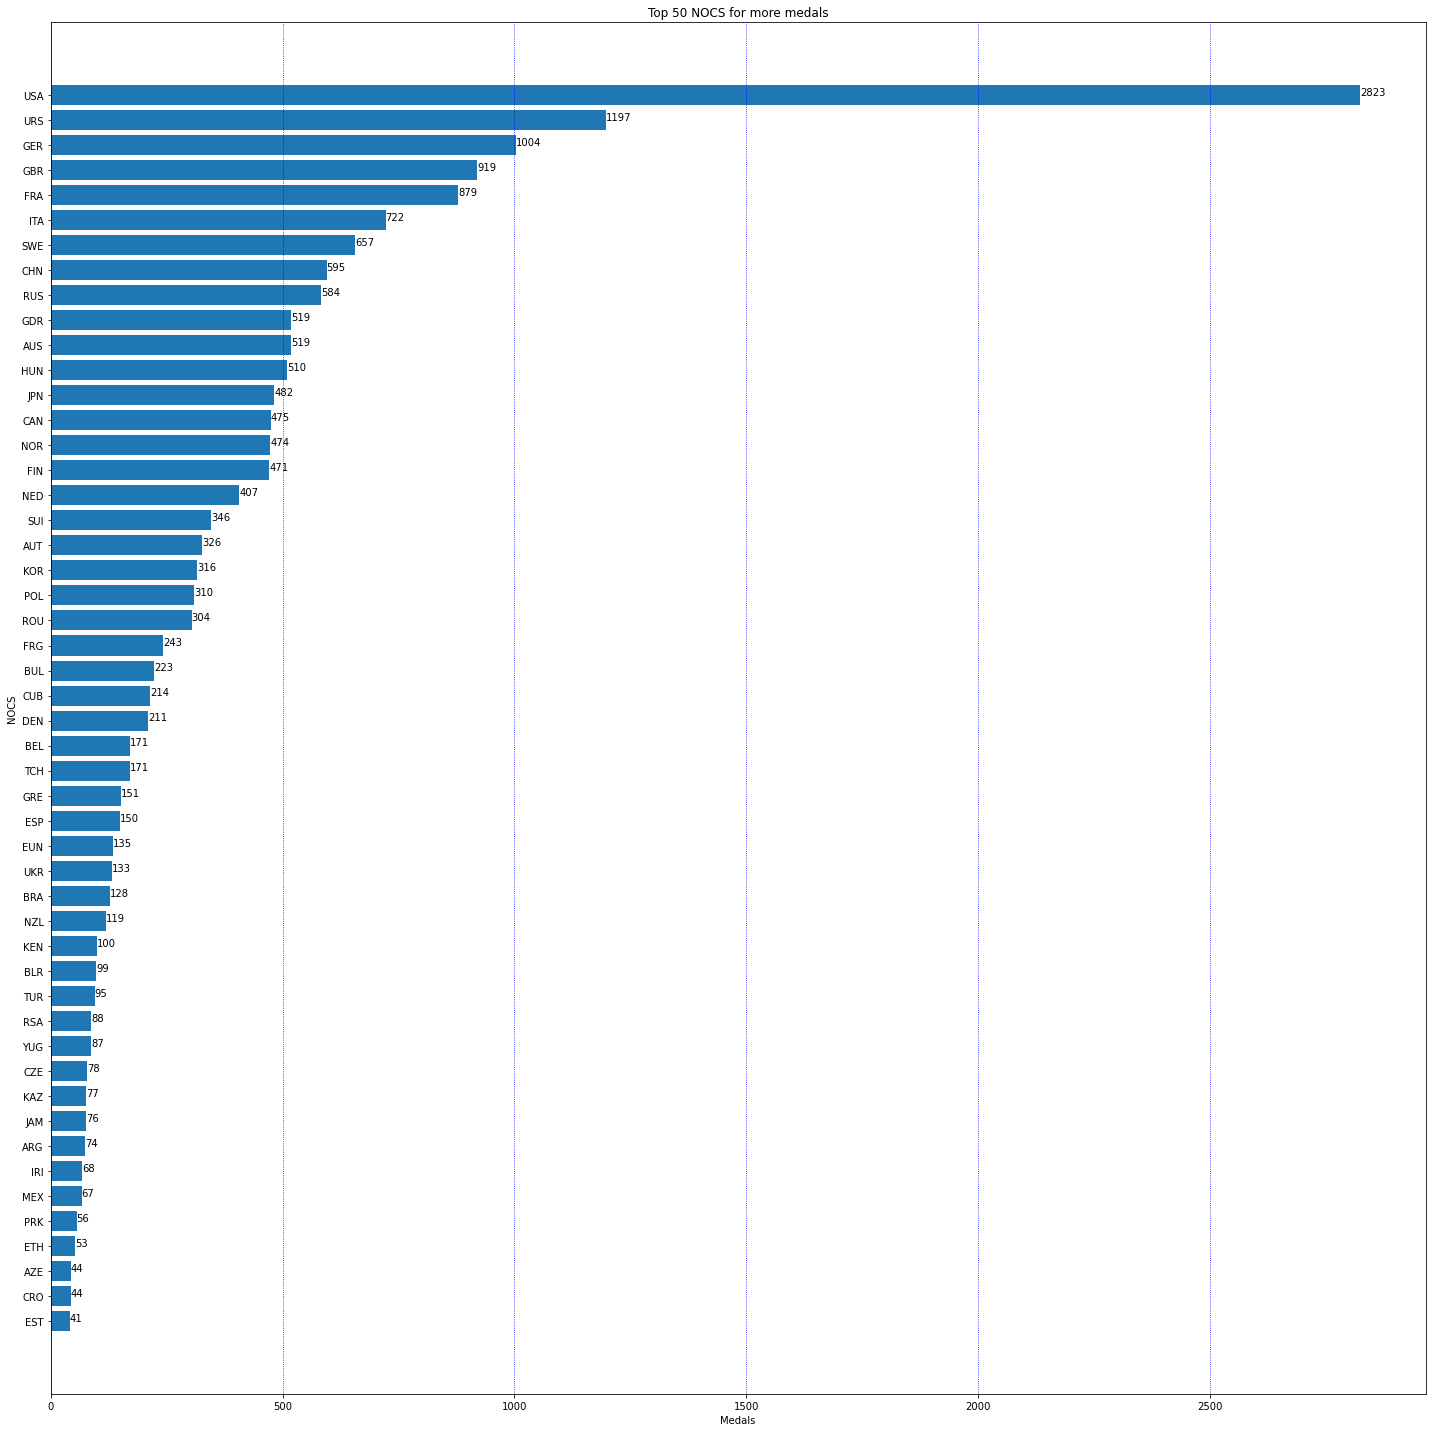

In [130]:
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(20)
rects1 = ax.barh(np.arange(len(nocs_50)), medals_50, label=None)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Medals')
ax.set_title('Top 50 NOCS for more medals')
ax.set_yticks(np.arange(len(nocs_50)))
ax.set_yticklabels(nocs_50)
ax.set_ylabel('NOCS')

fig.tight_layout()
ax.invert_yaxis()

for index, value in enumerate(medals_50): 
    plt.text(value, index, 
             str(value)) 
ax.grid(axis='x',linestyle='dotted', color='b')
plt.show()

### A3 - Machine Learning - 45%

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)

In [132]:
#Carga de resultados de los dataframe filtrados
men_100m = results[results['Event'] == '100M Men']
men_100m = men_100m.drop(men_100m[men_100m['Result'] == 'None'].index).reset_index(drop=True)

for i in range(len(men_100m['Name'])):
    men_100m.loc[i] = [men_100m['Gender'][i], men_100m['Event'][i], men_100m['Location'][i], men_100m['Year'][i], men_100m['Medal'][i], men_100m['Name'][i].title(), men_100m['Nationality'][i], men_100m['Result'][i]]

men_100m['Medal'] = men_100m['Medal'].replace(['G', 'S', 'B'], ['Gold', 'Silver', 'Bronze'])


women_100m = results[results['Event'] == '100M Women']
women_100m = women_100m.drop(women_100m[women_100m['Result'] == 'None'].index).reset_index(drop=True)

for i in range(len(women_100m['Name'])):
    women_100m.loc[i] = [women_100m['Gender'][i], women_100m['Event'][i], women_100m['Location'][i], women_100m['Year'][i], women_100m['Medal'][i], women_100m['Name'][i].title(), women_100m['Nationality'][i], women_100m['Result'][i]]

women_100m['Medal'] = women_100m['Medal'].replace(['G', 'S', 'B'], ['Gold', 'Silver', 'Bronze'])

#combinamos los datos de ambos dataframe relativos a la prueba de 100 m, tanto masculina como femenina
events_100m_m = events[events['Event'] == 'Athletics Men\'s 100 metres']
events_100m_m = events_100m_m.dropna().reset_index(drop = True)
men_100m_compl = pd.merge(men_100m, events_100m_m, on=['Year', 'Medal'], how = 'inner')

events_100m_w = events[events['Event'] == 'Athletics Women\'s 100 metres']
events_100m_w = events_100m_w.dropna().reset_index(drop = True)
women_100m_compl = pd.merge(women_100m, events_100m_w, on=['Year','Medal'], how ='inner')

#print(men_100m_compl)

#print(women_100m.sort_values(by='Year', ascending=True))
#print(events_100m_w.sort_values(by='Year', ascending=True))

In [133]:
data_m = men_100m_compl.drop(['Gender', 'Event_x', 'Location', 'Year', 'Medal', 'Name_x', 'Nationality', 'ID', 'Name_y', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event_y'], axis=1)
#print(data_m)

data_w = women_100m_compl.drop(['Gender', 'Event_x', 'Location', 'Year', 'Medal', 'Name_x', 'Nationality', 'ID', 'Name_y', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event_y'], axis=1)
#print(data_w)

#obtenemos las columnas objeto del estudio: Result, Sex, Age, Height, Weight
data_ml = pd.DataFrame([], columns=['Result', 'Sex', 'Age', 'Height', 'Weight'])

for i in range(len(data_m.index)):
    data_ml.loc[i] = data_m.loc[i]

for j in range(1, len(data_w.index)+1):
    data_ml.loc[i+j] = data_w.loc[j-1]
    

#sustotuimos los valores de los sexos por lo solicitado en el enunciado
data_ml['Sex'] = data_ml['Sex'].replace(['M', 'F'], [0, 1])
print(data_ml)


    Result  Sex   Age  Height  Weight
0     9.81    0  29.0   196.0    95.0
1     9.89    0  34.0   186.0    80.0
2     9.91    0  21.0   176.0    70.0
3     9.69    0  21.0   196.0    95.0
4     9.89    0  23.0   188.0    80.0
..     ...  ...   ...     ...     ...
135   12.2    1  21.0   165.0    51.0
136   12.2    1  23.0   172.0    57.0
137   11.9    1  21.0   174.0    60.0
138   11.9    1  21.0   159.0    48.0
139   12.0    1  22.0   182.0    68.0

[140 rows x 5 columns]


In [138]:
#importamos las librerías necesarias para realizar el estudio

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = data_ml['Result']
X = data_ml.drop(columns = ['Result'])

#print(x)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Realizamos el train y ek test de ambas variables

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)


predict_values = pd.DataFrame([], columns=['Sex', 'Age', 'Height', 'Weight'])

age_input = input('Introduce la Edad: ')
sex_input = input('Introduce el Sexo (0: Hombre, 1: Mujer): ')
height_input = input('Introduce la Altura: ')
weight_input = input('Introduce el Peso: ')

predict_values.loc[0] = [sex_input, age_input, height_input, weight_input]

# make predictions on the testing set
y_pred = linreg.predict(predict_values)
print('Segun el modelo escogido, el atleta con los datos introducidos hara un tiempo de: ' + str(y_pred))

(105, 4)
(105,)
(35, 4)
(35,)
11.35133315771596
[ 0.54285575 -0.03286802  0.01076827 -0.02800526]


Introduce la Edad:  34
Introduce el Sexo (0: Hombre, 1: Mujer):  1
Introduce la Altura:  123
Introduce el Peso:  44


Segun el modelo escogido, el atleta con los datos introducidos hara un tiempo de :[10.86894209]


In [ ]:
#[11.61333014]